<a href="https://colab.research.google.com/github/greeenboi/Iris-Classifier-project/blob/gcolab/iris_clasifier_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries;
# Planning the approach to iris classifier

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
#test with 80-20 split ratio
#test with 50-50 split ratio 

#as for algortihms :
#lets use logistic regressioon
#and KNN method
#and SVM(support vector machine), a speciality of seaborn library

# Importing dataset 

In [ ]:
df=pd.read_csv(r"/content/Iris.csv")

df.columns#i downloaded the dataset and uploaded to the gcolab runtime server, and called its address, while naming it

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Visualising with seaborn and pandas

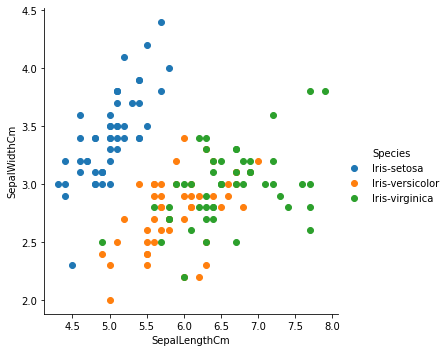

In [ ]:
sns.FacetGrid(df, hue="Species", height=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
   #using seaborn plotting to make a scatterplot that shows the species/sepal length
   #by using map function and adding a hue to differentiate the species

In [ ]:
#let us now show the petal length of each species in order to gain an uderstanding on how to build the model

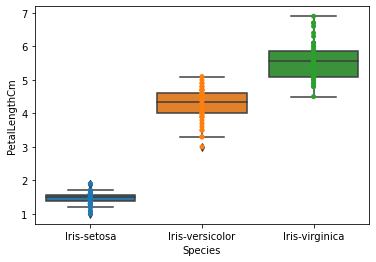

In [ ]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=df)#shows range of petal length
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=False, edgecolor="green")#shows the range again but its more accurate

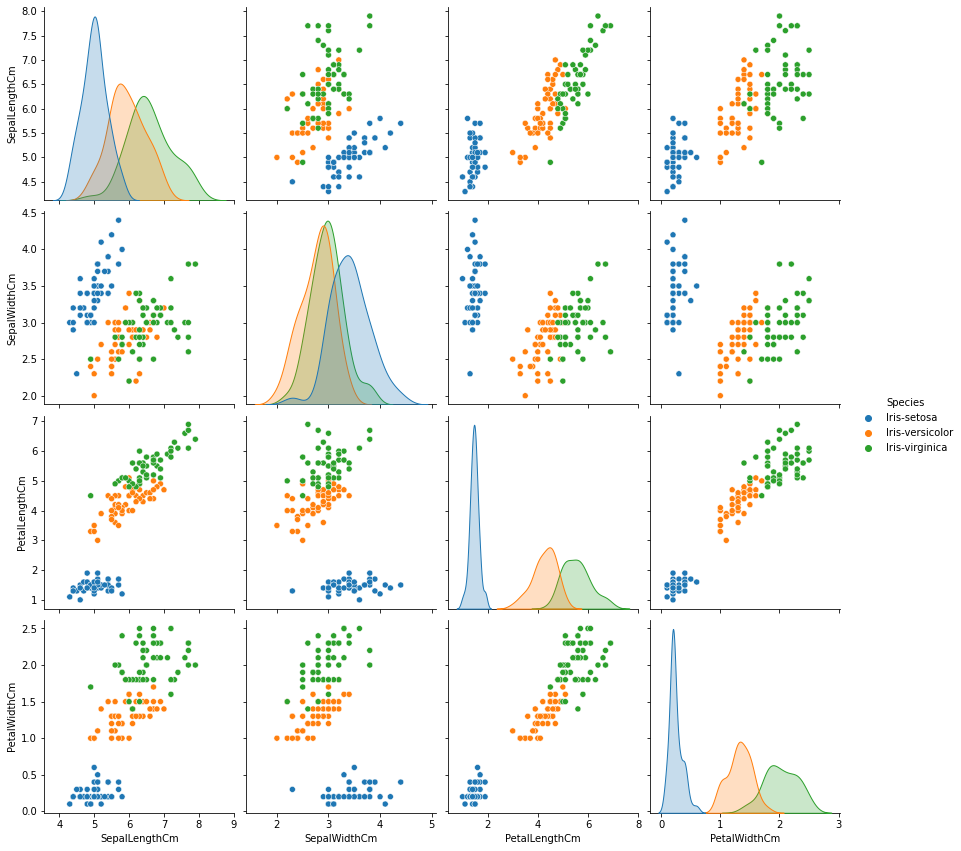

In [ ]:
#now let us compare the variables(sepal length, sepal width, petal length, petal width) by the different species in 2 differennt types of graphs
sns.pairplot(df.drop("Id", axis=1), hue="Species", height=3)

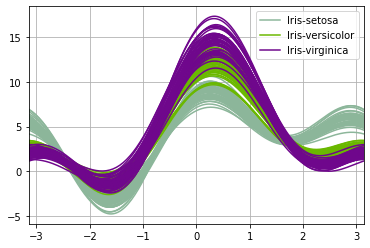

In [ ]:
from pandas.plotting import andrews_curves
andrews_curves(df.drop("Id", axis=1), "Species")

# Model Training and Testing


In [ ]:
#let us first approach model creation with 80-20 split and logistic regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# let us now seperate the data into dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
#now to train the model
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))
lr1=accuracy_score(y_pred,y_test)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
accuracy is 1.0


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))
knn1=accuracy_score(y_pred,y_test)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
accuracy is 1.0


In [ ]:
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))
svm1=accuracy_score(y_pred,y_test)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[ 8  0  0]
 [ 0 11  1]
 [ 0  0 10]]
accuracy is 0.9666666666666667


# Retraining the model with a different ratio

In [ ]:
#now let us retrain the model and change the split ratio to 50-50

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

In [ ]:
#now to train the model
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))
lr2=accuracy_score(y_pred,y_test)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
accuracy is 1.0


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))
knn2=accuracy_score(y_pred,y_test)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
accuracy is 1.0


In [ ]:
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))
svm2=accuracy_score(y_pred,y_test)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[ 8  0  0]
 [ 0 11  1]
 [ 0  0 10]]
accuracy is 0.9666666666666667


# Comparing and visualising the accuracy as a plot

In [ ]:
d={
    'Test algorithms':['Logistic Regression','KNN','SVM'],
    '80-20 ratio':[lr1,knn1,svm1],
    '50-50 ratio':[lr2,knn2,svm2]   
}
acc=pd.DataFrame(data=d)
acc

,Test algorithms,80-20 ratio,50-50 ratio
0,Logistic Regression,1.000000,1.000000
1,KNN,1.000000,1.000000
2,SVM,0.966667,0.966667


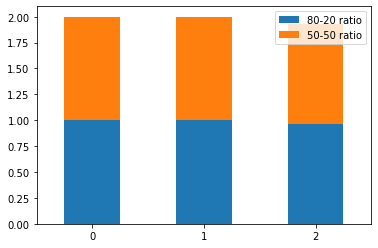

In [ ]:
ax = acc.plot.bar(rot=0,stacked=True)
